In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/event_logs.csv")
df.head()

,event_id,timestamp,source,message,user,label,reason
0,4723,2025-01-01T00:00:18,Microsoft-Windows-Security-Auditing,User attempted to change password,user19,benign,Legitimate activity
1,4722,2025-01-01T00:00:25,Microsoft-Windows-Security-Auditing,A user account was enabled,user14,benign,Legitimate activity
2,4688,2025-01-01T00:00:28,Microsoft-Windows-Security-Auditing,A new process has been created,user10,benign,Legitimate activity
3,4720,2025-01-01T00:00:31,Microsoft-Windows-Security-Auditing,A user account was created,user6,benign,Legitimate activity
4,4688,2025-01-01T00:01:00,Microsoft-Windows-Security-Auditing,Execution of suspicious script (PowerShell att...,attacker9,malicious,Execution of suspicious script (PowerShell att...


In [4]:
df['label'] = df.apply(lambda row: 'benign' if row['label'] == 'benign' else row['reason'], axis=1)

In [5]:
df.tail(50)

,event_id,timestamp,source,message,user,label,reason
99950,4672,2025-01-30T23:40:20,Microsoft-Windows-Security-Auditing,Unauthorized access to admin account,attacker10,Unauthorized access to admin account,Unauthorized access to admin account
99951,4688,2025-01-30T23:40:41,Microsoft-Windows-Security-Auditing,A new process has been created,user37,benign,Legitimate activity
99952,5145,2025-01-30T23:41:39,Microsoft-Windows-Security-Auditing,A network share object was accessed,user34,benign,Legitimate activity
99953,4719,2025-01-30T23:41:45,Microsoft-Windows-Security-Auditing,Audit policy changed to cover tracks,attacker3,Audit policy changed to cover tracks,Audit policy changed to cover tracks
99954,5145,2025-01-30T23:41:46,Microsoft-Windows-Security-Auditing,A network share object was accessed,user50,benign,Legitimate activity
99955,4740,2025-01-30T23:42:18,Microsoft-Windows-Security-Auditing,A user account was locked out,user24,benign,Legitimate activity
99956,5145,2025-01-30T23:43:55,Microsoft-Windows-Security-Auditing,A network share object was accessed,user15,benign,Legitimate activity
99957,4719,2025-01-30T23:44:00,Microsoft-Windows-Security-Auditing,Audit policy changed to cover tracks,attacker4,Audit policy changed to cover tracks,Audit policy changed to cover tracks
99958,4625,2025-01-30T23:44:23,Microsoft-Windows-Security-Auditing,Multiple failed login attempts (brute force),attacker2,Multiple failed login attempts (brute force),Multiple failed login attempts (brute force)
99959,4624,2025-01-30T23:44:30,Microsoft-Windows-Security-Auditing,User login successful,user31,benign,Legitimate activity


In [6]:
X = df.iloc[:, :-2]

Y = df["label"]

In [7]:
import pandas as pd

# Convert timestamp column to datetime format
X['timestamp'] = pd.to_datetime(X['timestamp'])

# Extract meaningful time-based features
X['hour'] = X['timestamp'].dt.hour  # Hour of the day (0-23)
X['minute'] = X['timestamp'].dt.minute  # Minute of the hour (0-59)
X['second'] = X['timestamp'].dt.second  # Second of the minute (0-59)


# Drop the original timestamp column (since it’s now numeric)
X = X.drop(columns=['timestamp'])


In [8]:
X

,event_id,source,message,user,hour,minute,second
0,4723,Microsoft-Windows-Security-Auditing,User attempted to change password,user19,0,0,18
1,4722,Microsoft-Windows-Security-Auditing,A user account was enabled,user14,0,0,25
2,4688,Microsoft-Windows-Security-Auditing,A new process has been created,user10,0,0,28
3,4720,Microsoft-Windows-Security-Auditing,A user account was created,user6,0,0,31
4,4688,Microsoft-Windows-Security-Auditing,Execution of suspicious script (PowerShell att...,attacker9,0,1,0
...,...,...,...,...,...,...,...
99995,4672,Microsoft-Windows-Security-Auditing,Unauthorized access to admin account,attacker10,23,57,37
99996,4688,Microsoft-Windows-Security-Auditing,A new process has been created,user36,23,58,15
99997,4672,Microsoft-Windows-Security-Auditing,Special privileges assigned to new logon,user37,23,58,18
99998,4722,Microsoft-Windows-Security-Auditing,A user account was enabled,user31,23,58,50


In [11]:

from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
encoder = LabelEncoder()
for col in ['event_id', 'source', 'message','user']:  
    X[col] = encoder.fit_transform(X[col])




In [12]:
X

,event_id,source,message,user,hour,minute,second
0,7,0,17,20,0,0,18
1,6,0,3,15,0,0,25
2,3,0,1,11,0,0,28
3,5,0,2,56,0,0,31
4,3,0,8,9,0,1,0
...,...,...,...,...,...,...,...
99995,2,0,14,1,23,57,37
99996,3,0,1,39,23,58,15
99997,2,0,12,40,23,58,18
99998,6,0,3,34,23,58,50


In [13]:
Y= encoder.fit_transform(Y)

In [14]:
Y

array([8, 8, 8, ..., 8, 8, 8])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize all numerical features




In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X,Y , random_state=104,test_size=0.25, shuffle=True)

In [17]:
import numpy as np

seq_length = 10  # Define the sequence length
feature_dim = X_train.shape[1]  # Number of features

# Reshape data for LSTM using a sliding window approach
X_train_reshaped = np.array([X_train[i: i + seq_length] for i in range(len(X_train) - seq_length)])

# Adjust labels accordingly
y_train_reshaped = np.array(y_train[seq_length:])

# Check shape
print("X_train shape:", X_train_reshaped.shape)  # Expected: (samples, seq_length, feature_dim)
print("y_train shape:", y_train_reshaped.shape)


X_train shape: (74990, 10, 7)
y_train shape: (74990,)


In [18]:
df["label"].nunique()
X.shape

(100000, 7)

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, feature_dim)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')  # Use 'sigmoid' for binary classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
from tensorflow.keras.utils import to_categorical

# Convert integer labels to categorical (one-hot)
y_train_reshaped = to_categorical(y_train_reshaped, num_classes=13)


In [21]:
print("X_train shape:", X_train_reshaped.shape)  # Expected: (num_samples, seq_length, feature_dim)
print("y_train shape:", y_train_reshaped.shape)  # Expected: (num_samples, num_classes)


X_train shape: (74990, 10, 7)
y_train shape: (74990, 13)


In [22]:
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32)


Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.8442 - loss: 0.8333
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8494 - loss: 0.7427
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8482 - loss: 0.7469
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.8509 - loss: 0.7353
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8486 - loss: 0.7436
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8485 - loss: 0.7434
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.8495 - loss: 0.7392
Epoch 8/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.8481 - loss: 0.7432
Epoch 9/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.8499 - loss: 0.7356
Epoch 10/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8490 - loss: 0.7381
Epoch 11/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.8490 - loss: 0.7374
Epoch 12

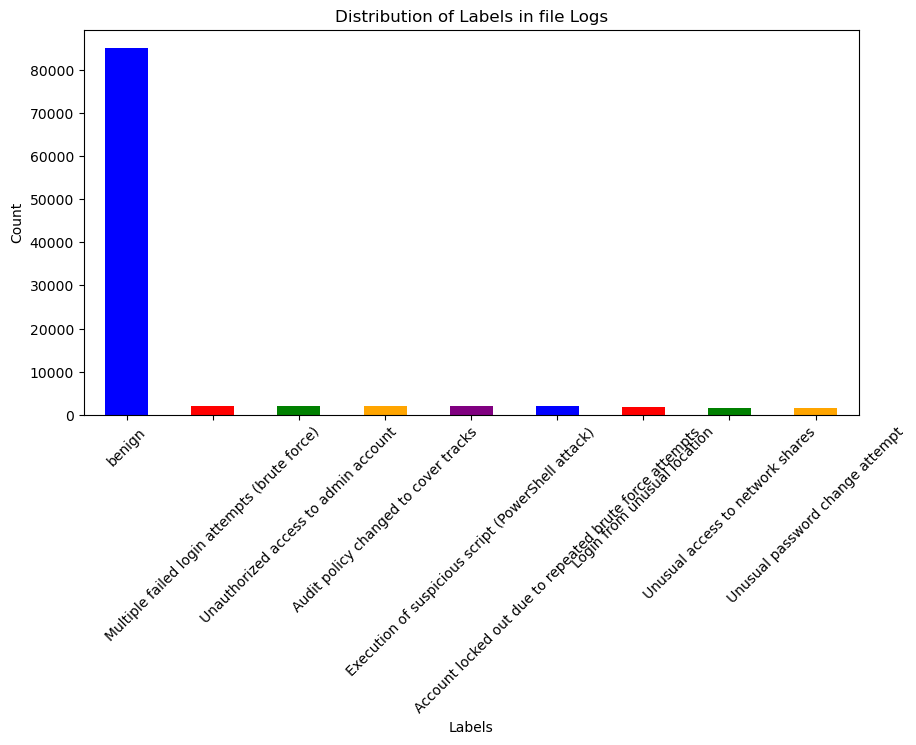

In [23]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in file Logs")
plt.xticks(rotation=45)
plt.show()


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define RNN Model
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(seq_length, feature_dim)),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')  # Adjust for the number of classes
])

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_rnn.summary())

# Reshape X_test for RNN Evaluation
X_test_reshaped = np.array([X_test[i: i + seq_length] for i in range(len(X_test) - seq_length)])
y_test_reshaped = np.array(y_test[seq_length:])

# One-hot encode y_test_reshaped to match the model's expected output
y_test_reshaped = to_categorical(y_test_reshaped, num_classes=13)

# Train the RNN model
history_rnn = model_rnn.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32)

# Evaluate the RNN model
loss, accuracy = model_rnn.evaluate(X_test_reshaped, y_test_reshaped, batch_size=32)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 128)        │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,269 (126.05 KB)

 Trainable params: 32,269 (126.05 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8045 - loss: 0.8811
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8487 - loss: 0.7466
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8497 - loss: 0.7424
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8485 - loss: 0.7450
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8497 - loss: 0.7404
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8479 - loss: 0.7466
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8478 - loss: 0.7458
Epoch 8/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8485 - loss: 0.7443
Epoch 9/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8492 - loss: 0.7409
Epoch 10/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8489 - loss: 0.7417
Epoch 11/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8505 - loss: 0.7351
Epoch 12/50
2344/2